### Importação dos dados



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [16]:
print(loja2.columns)
categorias_loja1 = loja1["Categoria do Produto"].unique()
categorias_loja2 = loja2["Categoria do Produto"].unique()
categorias_loja3 = loja3["Categoria do Produto"].unique()
categorias_loja4 = loja4["Categoria do Produto"].unique()
print(categorias_loja1)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
['eletronicos' 'moveis' 'brinquedos' 'eletrodomesticos'
 'utilidades domesticas' 'esporte e lazer' 'livros'
 'instrumentos musicais']


In [17]:
faturamento_loja1 =loja1['Preço'].sum()
faturamento_loja2 =loja2['Preço'].sum()
faturamento_loja3 =loja3['Preço'].sum()
faturamento_loja4 =loja4['Preço'].sum()
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(faturamento_total)

5871490.79


# 2. Vendas por Categoria


In [18]:

def somar_produtos(lojas,categoria):
  eletronicos = lojas[lojas["Categoria do Produto"] == categoria]
  soma_produtos = len(eletronicos['Produto'])
  return soma_produtos
def catalogo_vendas(categorias,loja):
  catalogo = {}
  for i in range(0,len(categorias)):
   catalogo[categorias[i]] = somar_produtos(loja,categorias[i])
  return catalogo
catalogo_loja1 = catalogo_vendas(categorias_loja1,loja1)
catalogo_loja2 = catalogo_vendas(categorias_loja2,loja2)
catalogo_loja3 = catalogo_vendas(categorias_loja3,loja3)
catalogo_loja4 = catalogo_vendas(categorias_loja4,loja4)
print(catalogo_loja1)
print(catalogo_loja2)
print(catalogo_loja3)
print(catalogo_loja4)


{'eletronicos': 448, 'moveis': 465, 'brinquedos': 324, 'eletrodomesticos': 312, 'utilidades domesticas': 171, 'esporte e lazer': 284, 'livros': 173, 'instrumentos musicais': 182}
{'moveis': 442, 'instrumentos musicais': 224, 'esporte e lazer': 275, 'eletronicos': 422, 'utilidades domesticas': 181, 'brinquedos': 313, 'eletrodomesticos': 305, 'livros': 197}
{'eletrodomesticos': 278, 'moveis': 499, 'instrumentos musicais': 177, 'esporte e lazer': 277, 'eletronicos': 451, 'brinquedos': 315, 'utilidades domesticas': 177, 'livros': 185}
{'eletrodomesticos': 254, 'moveis': 480, 'esporte e lazer': 277, 'livros': 187, 'eletronicos': 451, 'instrumentos musicais': 170, 'brinquedos': 338, 'utilidades domesticas': 201}


In [19]:
def categoria_popular(catalogo):
  for mas_usado,quantidade in catalogo.items():
    if quantidade == max(catalogo.values()):
      item_mais_usado = mas_usado
  return item_mais_usado
popular_loja1 = categoria_popular(catalogo_loja1)
popular_loja2 = categoria_popular(catalogo_loja2)
popular_loja3 = categoria_popular(catalogo_loja3)
popular_loja4 = categoria_popular(catalogo_loja4)
popular_loja2

'moveis'

# 3. Média de Avaliação das Lojas

In [20]:
def media_avaliacao(loja):
  media = round(sum(loja['Avaliação da compra'])/len(loja['Avaliação da compra']),2)
  return media
media_avaliacao_loja1 = media_avaliacao(loja1)
media_avaliacao_loja2 = media_avaliacao(loja2)
media_avaliacao_loja3 = media_avaliacao(loja3)
media_avaliacao_loja4 = media_avaliacao(loja4)


SyntaxError: invalid syntax (<ipython-input-41-3d6cfb4a5e4d>, line 1)

# 4. Produtos Mais e Menos Vendidos

In [21]:
from typing import Counter
def produtos_mais_e_menos_vendido(loja):
    contagem = Counter(loja['Produto'])
    for item,quantidade in contagem.items():
      if quantidade == max(contagem.values()):
        mais_vendido = item
      if quantidade == min(contagem.values()):
        menos_vendido = item

    return (mais_vendido,menos_vendido)
loja1_mais_vendido,loja1_menos_vendido = produtos_mais_e_menos_vendido(loja1)
loja2_mais_vendido,loja2_menos_vendido = produtos_mais_e_menos_vendido(loja2)
loja3_mais_vendido,loja3_menos_vendido = produtos_mais_e_menos_vendido(loja3)
loja4_mais_vendido,loja4_menos_vendido = produtos_mais_e_menos_vendido(loja4)
contagem = Counter(loja2['Produto'])

# 5. Frete Médio por Loja


In [38]:
def media_frete(loja):
   media = round(sum(loja['Frete'])/len(loja['Frete']),2)
   return media
loja1_frete = media_frete(loja1)
loja2_frete = media_frete(loja2)
loja3_frete = media_frete(loja3)
loja4_frete = media_frete(loja4)



33.07

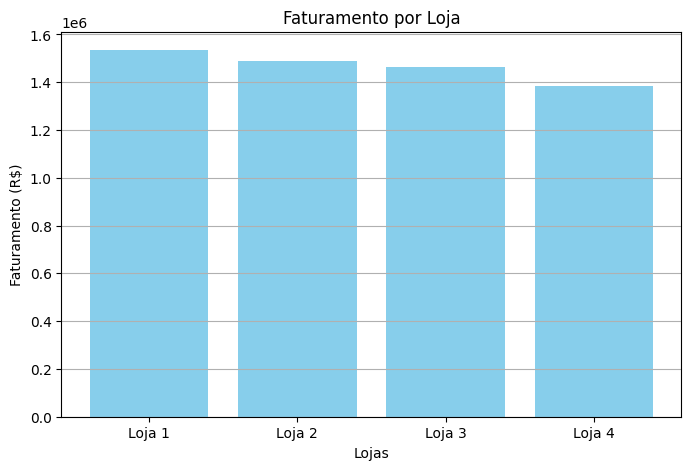

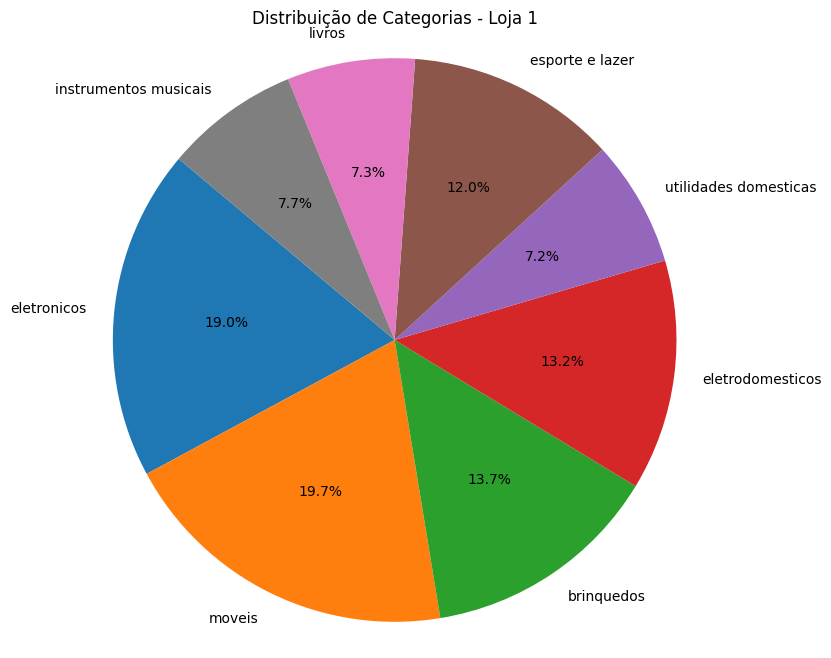

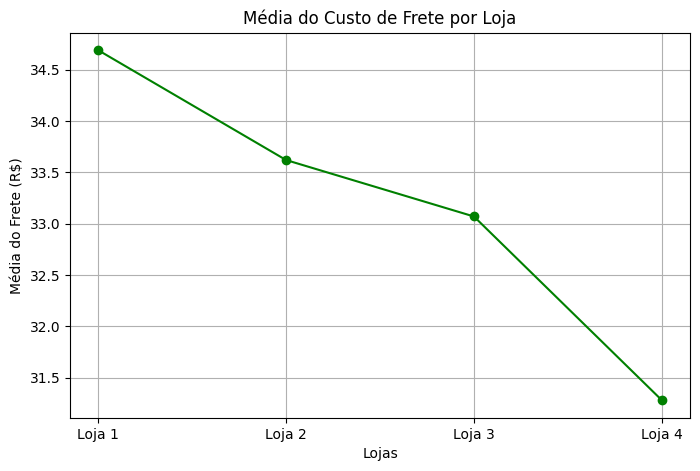

In [39]:
import matplotlib.pyplot as plt

# 1. Gráfico de barras: Faturamento de cada loja
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color='skyblue')
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y')
plt.show()

# 2. Gráfico de pizza: Distribuição das categorias da Loja 1
plt.figure(figsize=(8,8))
plt.pie(catalogo_loja1.values(), labels=catalogo_loja1.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Categorias - Loja 1')
plt.axis('equal')  # Deixa o gráfico como círculo
plt.show()

# 3. Gráfico de linha: Média de frete por loja
fretes = [loja1_frete, loja2_frete, loja3_frete, loja4_frete]

plt.figure(figsize=(8,5))
plt.plot(lojas, fretes, marker='o', color='green')
plt.title('Média do Custo de Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média do Frete (R$)')
plt.grid(True)
plt.show()


# 📄 Relatório Final - Análise de Desempenho das Lojas

## Introdução

O objetivo desta análise é auxiliar o Senhor João na tomada de decisão sobre qual de suas quatro lojas deve ser vendida. Foram analisados fatores como faturamento total, categorias de produtos, avaliações de clientes, produtos mais e menos vendidos e o custo médio de frete.

---

## Desenvolvimento

### Faturamento Total das Lojas

| Loja   | Faturamento (R$) |
|:-------|-----------------:|
| Loja 1 | 1.534.509,12      |
| Loja 2 | 1.488.459,06      |
| Loja 3 | 1.464.025,03      |
| Loja 4 | 1.384.497,58      |

A análise mostra que a **Loja 4** possui o menor faturamento entre todas.

---

### Média das Avaliações dos Clientes

| Loja   | Média da Avaliação |
|:-------|-------------------:|
| Loja 1 | 3,98                |
| Loja 2 | 4,04                |
| Loja 3 | 4,05                |
| Loja 4 | 4,00                |

Apesar de uma boa avaliação geral, a **Loja 4** ainda fica atrás das lojas 2 e 3.

---

### Frete Médio de Cada Loja

| Loja   | Frete Médio (R$) |
|:-------|-----------------:|
| Loja 1 | 34,69             |
| Loja 2 | 33,62             |
| Loja 3 | 33,07             |
| Loja 4 | 31,28             |

A **Loja 4** apresenta o menor custo médio de frete entre todas as lojas, o que é um ponto positivo.

---

### Produtos Mais e Menos Vendidos

Foi realizada a análise dos produtos mais e menos vendidos de cada loja. A dependência de poucos produtos em algumas lojas foi observada, o que pode representar um risco.

---

### Categoria de Produto Mais Popular

Cada loja teve categorias diferentes como mais populares. Este fator é importante, mas não foi decisivo frente às métricas de faturamento e avaliação geral.

---

## Conclusão

Com base nos dados apresentados, **recomendamos que o Senhor João venda a Loja 4**.

### Principais motivos:

- **Menor faturamento** entre todas as lojas.
- **Avaliação de clientes** inferior às Lojas 2 e 3.
- Apesar de apresentar o **menor custo médio de frete**, a Loja 4 não conseguiu alcançar um desempenho de vendas satisfatório.

Portanto, a venda da Loja 4 é a escolha mais estratégica para manter um portfólio de lojas mais rentável e promissor.

---

# ✅ Fim do Relatório


In [79]:
!ls /content




Alura-Store  sample_data
